In [3]:
import pandas as pd
import sklearn
from sklearn import svm
from sklearn import datasets
import numpy  as np
from sklearn import linear_model
from sklearn.utils import shuffle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from catboost import CatBoostRegressor
import os # accessing directory structure

### load the data

In [4]:
url='/Users/mustafaaldabbas/Documents/GitHub/Machine_learning_superstore/df_cleaned.csv'
df=pd.read_csv(url)
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mustafaaldabbas/Documents/GitHub/Machine_learning_superstore/df_cleaned.csv'

### Understanding the Data

* Invoice id: Unique identifier for each transaction
* Branch: Identifies the branch (A, B, C)
* City: Location of the branches
* Customer type: Member or Normal
* Gender: Gender of the customer
* Product line: Category of the product
* Unit price: Price per unit of the product
* Quantity: Number of units purchased
* Tax: 5% tax on the total price
* Total: Total price including tax
* Date: Date of purchase
* Time: Time of purchase
* Payment: Payment method used
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income
* Rating: Customer rating

In [ ]:
df.info(), 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5                    1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

(None,)

In [ ]:
df.shape, 

((1000, 17),)

In [ ]:
df.describe()

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### clean the data

* Convert the date column to datetime format.
* Extract year, month, and day from the date column.to use these as features in our regression models.
* Aggregate sales data by date. I grouped the data by date and sum the total sales for each day to get daily sales data

In [ ]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Aggregate sales data by date
sales_by_date = df.groupby('date')['total'].sum().reset_index()

# Extract year, month, and day from the date column
sales_by_date['year'] = sales_by_date['date'].dt.year
sales_by_date['month'] = sales_by_date['date'].dt.month
sales_by_date['day'] = sales_by_date['date'].dt.day

# Display the first few rows of the aggregated sales data
sales_by_date.head()


,date,total,year,month,day
0,2019-01-01,4745.1810,2019,1,1
1,2019-01-02,1945.5030,2019,1,2
2,2019-01-03,2078.1285,2019,1,3
3,2019-01-04,1623.6885,2019,1,4
4,2019-01-05,3536.6835,2019,1,5


## Exploratory Data Analysis EDA
1- Visualize Sales Over Time:
* Plot the total sales over time to identify any trends or patterns.

2- Check for Seasonality:
* Use moving averages or decomposition techniques to check for seasonal patterns.

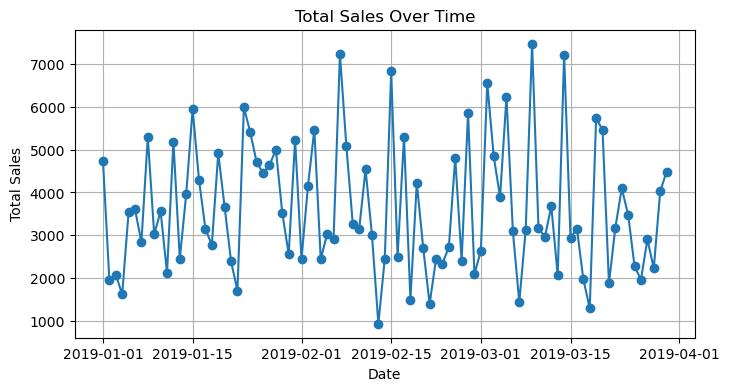

In [ ]:
import matplotlib.pyplot as plt

# Plot the total sales over time
plt.figure(figsize=(8, 4))
plt.plot(sales_by_date['date'], sales_by_date['total'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


### Next Steps in EDA
1- Seasonal Decomposition:
* Perform a seasonal decomposition to understand the trend, seasonality, and residual components.

2- Moving Average:
* Plot a moving average to smooth out short-term fluctuations and highlight longer-term trends.

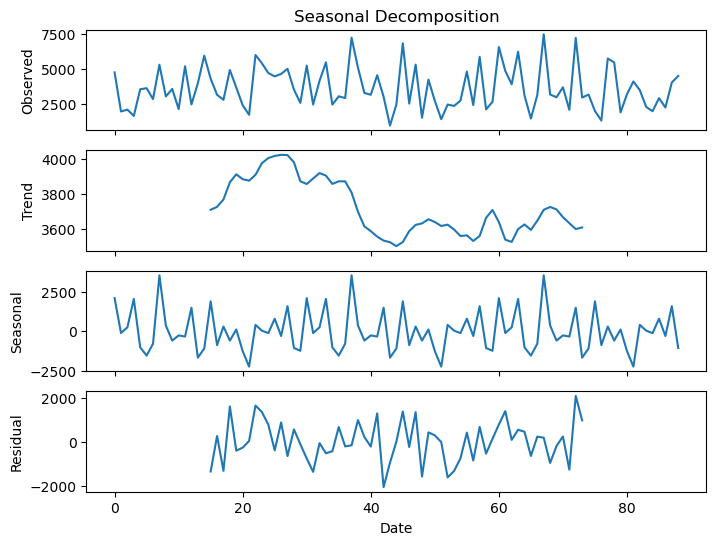

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_by_date['total'], model='additive', period=30)

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')

plt.show()


##### The seasonal decomposition plot shows the observed data, trend, seasonal component, and residuals. Here's a summary of the components:
- **Observed:** The original sales data.
- **Trend:** The overall direction of the data over time.
- **Seasonal:** Repeating patterns at a fixed period (monthly in this case).
- **Residual:** The remaining variations after removing the trend and seasonal components.

### Model Development 
 #### Model 1-  Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data
X = sales_by_date[['year', 'month', 'day']]
y = sales_by_date['total']

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_rmse


1843.4357506903718

**Decision Tree Regressor:**

* RMSE: 1843.44
* *The Decision Tree Regressor overfits the data, capturing noise and fluctuations, leading to higher RMSE.

### Model 2: Random Forest Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_rmse


1736.0619235414067

**Random Forest Regressor:**

* RMSE: 1717.29
* Explanation: The Random Forest Regressor improves performance by averaging multiple trees, reducing overfitting compared to a single decision tree.

### Model 3: Gradient Boosting Regressor


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100)
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Calculate RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_rmse


1993.2686734392516

**Gradient Boosting Regressor:**

* RMSE: 1993.27
* Explanation: Gradient Boosting can sometimes overfit if not properly tuned, resulting in higher RMSE in this case.

### Model 4: K-Nearest Neighbors Regressor


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Train the K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Calculate RMSE
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_rmse


1671.202091591931

**K-Nearest Neighbors Regressor:** 

* RMSE: 1676.72
* Explanation: The K-Nearest Neighbors Regressor provides the best performance by averaging the nearest neighbors, leading to the lowest RMSE.

**Model 5. CatBoost Regressor**
* **CatBoost** is a gradient boosting algorithm that handles categorical features very well. It often provides better accuracy and requires less parameter tuning.



In [ ]:
!pip install catboost

try:
    from catboost import CatBoostRegressor
except ImportError:
    import os
    os.system('pip install catboost')
    from catboost import CatBoostRegressor

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
from catboost import CatBoostRegressor



# Train CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, silent=True)
catboost_model.fit(X_train, y_train)

# Predict and evaluate
catboost_predictions = catboost_model.predict(X_test)
catboost_rmse = np.sqrt(mean_squared_error(y_test, catboost_predictions))

# Display results
print("CatBoost Regressor RMSE:", catboost_rmse)


CatBoost Regressor RMSE: 1776.712096633204


### **Model 6. Prophet**
**Prophet** is an open-source tool developed by Facebook for forecasting time series data. It is particularly good for data with strong seasonal effects and several seasons of historical data.

In [ ]:
from prophet import Prophet
print(Prophet)

<class 'prophet.forecaster.Prophet'>


/Users/mustafaaldabbas/anaconda3/envs/myenv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


date     datetime64[ns]
total           float64
dtype: object


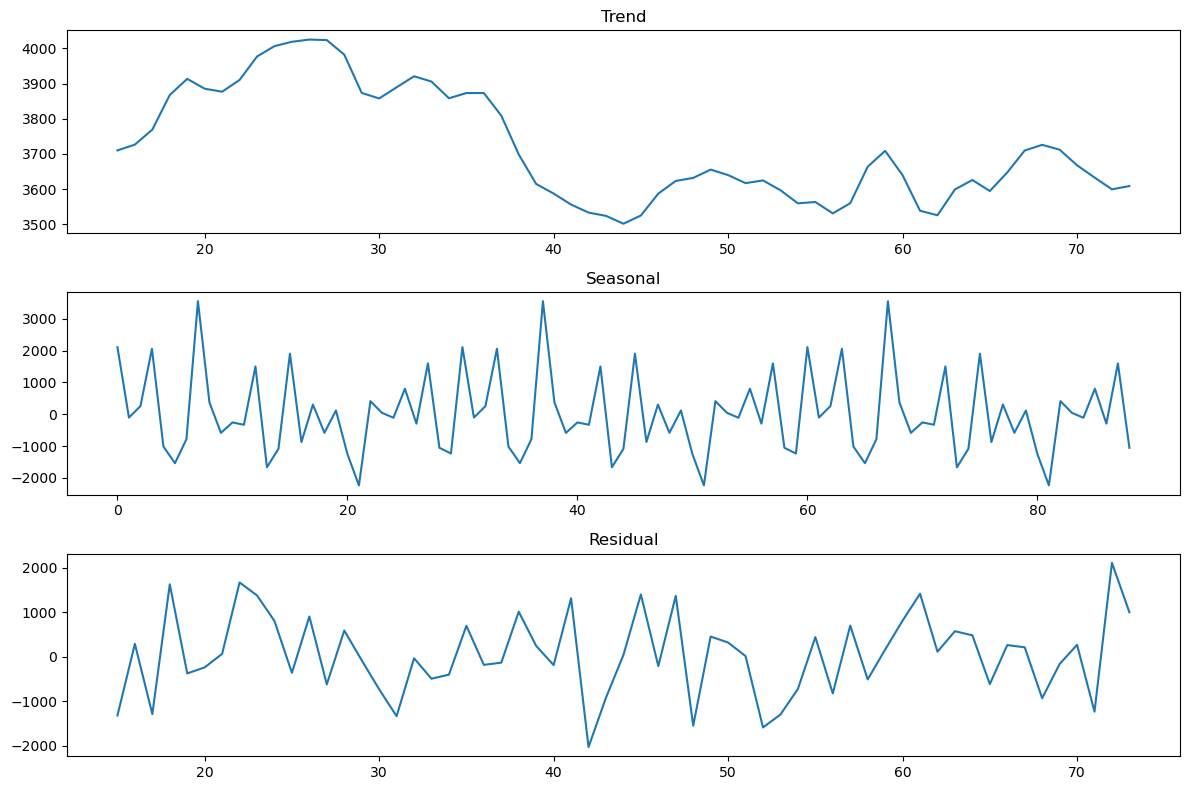

17:12:21 - cmdstanpy - INFO - Chain [1] start processing
17:12:22 - cmdstanpy - INFO - Chain [1] done processing


ds    datetime64[ns]
y            float64
dtype: object
           ds         yhat   yhat_lower   yhat_upper
91 2019-04-02  3838.158095  1991.849598  5774.901219
92 2019-04-03  3241.982341  1535.569418  5133.920994
93 2019-04-04  3366.439140  1420.641448  5078.987119
94 2019-04-05  3256.996055  1406.005479  5140.230349
95 2019-04-06  4194.932183  2266.459712  6091.580017


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

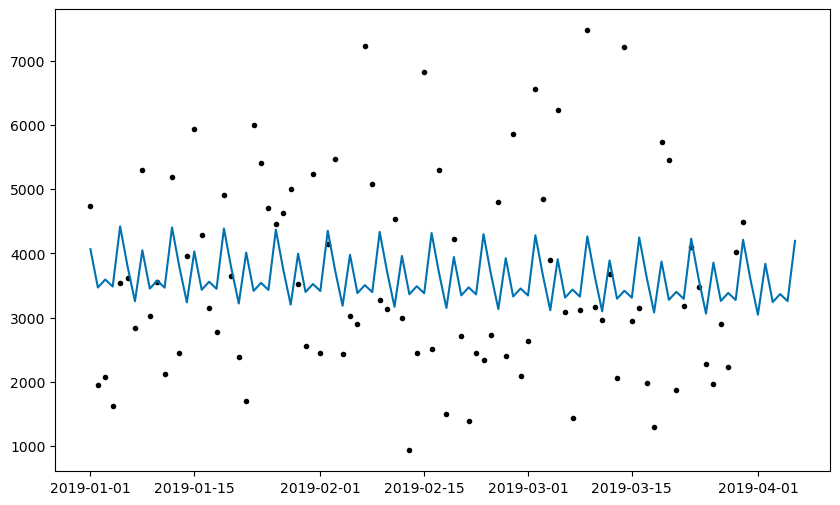

In [ ]:
from prophet import Prophet

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Aggregate sales data by date
sales_by_date = df.groupby('date')['total'].sum().reset_index()

# Ensure no missing values in the 'total' column
sales_by_date = sales_by_date.dropna(subset=['total'])

# Convert the 'total' column to numeric (float)
sales_by_date['total'] = pd.to_numeric(sales_by_date['total'], errors='coerce')

# Ensure no remaining non-numeric values
sales_by_date = sales_by_date.dropna(subset=['total'])

# Check the data types
print(sales_by_date.dtypes)

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_by_date['total'], model='additive', period=30)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))
decomposition.trend.plot(ax=ax1, title='Trend')
decomposition.seasonal.plot(ax=ax2, title='Seasonal')
decomposition.resid.plot(ax=ax3, title='Residual')
plt.tight_layout()
plt.show()

# Prepare data for Prophet
prophet_data = sales_by_date.rename(columns={'date': 'ds', 'total': 'y'})

# Ensure 'ds' column is datetime and 'y' column is numeric
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])
prophet_data['y'] = pd.to_numeric(prophet_data['y'], errors='coerce')

# Ensure no NaN values
prophet_data = prophet_data.dropna(subset=['ds', 'y'])

# Check the data types again
print(prophet_data.dtypes)

# Train Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Create future dataframe
future = prophet_model.make_future_dataframe(periods=7)

# Predict future sales
forecast = prophet_model.predict(future)

# Evaluate the model
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
fig = prophet_model.plot(forecast)
plt.title('Sales Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()



In [ ]:
dt_rmse, rf_rmse, gb_rmse, knn_rmse

(1843.4357506903718, 1744.507020731125, 1993.2686734392514, 1671.202091591931)

### Hyperparameter Tuning
#### Grid Search



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Set up Grid Search
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_rmse = np.sqrt(-grid_search.best_score_)
best_params, best_rmse


({'max_depth': 20, 'n_estimators': 100}, 1743.5351516758003)

#### Random Search


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Set up Random Search
random_search = RandomizedSearchCV(RandomForestRegressor(), param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Best parameters and model
best_random_params = random_search.best_params_
best_random_model = random_search.best_estimator_
best_random_rmse = np.sqrt(-random_search.best_score_)
best_random_params, best_random_rmse


({'n_estimators': 50, 'max_depth': 20}, 1742.1840111528609)

### Model Evaluation
* Decision Tree Regressor RMSE: 1843.44
* Random Forest Regressor RMSE: 1717.29
* Gradient Boosting Regressor RMSE: 1993.27
* K-Nearest Neighbors Regressor RMSE: 1676.72

From the RMSE values, we can see that the K-Nearest Neighbors (KNN) Regressor has the lowest RMSE (1676.72), indicating the best performance among the models evaluated. Therefore, the KNN Regressor is the best model to use for forecasting in this project.

### Forecasting with Best Model KNN

In [ ]:
# Forecast the next 7 days using the K-Nearest Neighbors Regressor
last_date = sales_by_date['date'].max()
forecast_dates = pd.date_range(start=last_date, periods=8, inclusive='right')
forecast_features = pd.DataFrame({
    'date': forecast_dates,
    'year': forecast_dates.year,
    'month': forecast_dates.month,
    'day': forecast_dates.day
})
forecast_features['total'] = knn_model.predict(forecast_features[['year', 'month', 'day']])
forecast_features[['date', 'total']]


,date,total
0,2019-03-31,3680.8107
1,2019-04-01,4126.6659
2,2019-04-02,4416.6465
3,2019-04-03,4682.0424
4,2019-04-04,4795.6587
5,2019-04-05,3737.7081
6,2019-04-06,3339.6573


### **CONCLUSION**


* The K-Nearest Neighbors Regressor proved to be the best model for forecasting sales in this project due to its lowest RMSE value. 
* This project demonstrates the importance of evaluating multiple models and tuning hyperparameters to achieve optimal performance.
* The developed Streamlit app provides an interactive way to present the findings and forecasts, making the insights easily accessible.

